In [13]:
import os
import numpy as np
from skimage.io import imread
from skimage.filters import gaussian
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt

### Open the whole image as numpy array

In [2]:
working_dir = 'C:/Users/Justin/Downloads/'  # Path to image data folder

img_path = os.path.join(working_dir, 'NeuN.tif')
img_path

'C:/Users/Justin/Downloads/NeuN.tif'

In [3]:
img = imread(img_path)
img = img[:, 2500:3000, 1700:2200]
img.shape, img.dtype

((64, 500, 500), dtype('uint8'))

### Blur the image with gaussian filter

In [5]:
img_blurred = gaussian(img, sigma=3, preserve_range=True)

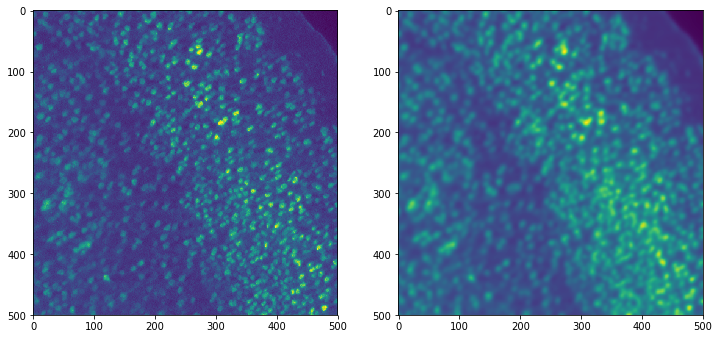

In [9]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(img[32])
plt.subplot(1, 2, 2)
plt.imshow(img_blurred[32])
plt.show()

### Detect bright spots

In [10]:
points = peak_local_max(img_blurred)
points.shape

(2492, 3)

In [15]:
img_points = np.zeros(img.shape, img.dtype)
img_points[points[:, 0], points[:, 1], points[:, 2]] = 255
img_points.shape

(64, 500, 500)

In [31]:
from ipywidgets import interactive
%matplotlib inline

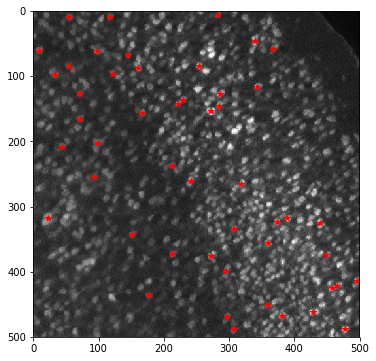

In [33]:
z = 32

def make_plot(z):
    z = int(z)
    idx = np.where(points[:, 0] == z)[0]
    points_plane = points[idx]

    plt.figure(figsize=(6, 6))
    plt.imshow(img[z], cmap='gray')
    plt.plot(points_plane[:, 2], points_plane[:, 1], 'r*')
    plt.show()

make_plot(z)

In [36]:
interactive_plot = interactive(make_plot, z=(0, 63))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

### Save ROI and detected points

In [38]:
np.save(os.path.join(working_dir, 'roi.npy'), img)
np.save(os.path.join(working_dir, 'points.npy'), points)